<a href="https://colab.research.google.com/github/johyunkang/python_stat/blob/main/chapter06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 06 대표적인 이산형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
%precision 3


'%.3f'

In [2]:
# 아래로 사용할 함수들 미리 정의

# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

# 평균(기댓값)에 대한 함수
def Expect(X, g=lambda x: x) :
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 분산에 대한 함수
def Vari(X, g=lambda x: x) :
    x_set, f = X
    mean = Expect(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [24]:
# 함수 미리 정의

# 확률변수를 인수로 가지며, 그 확률변수가 확률의 성질을 만족하는지 확인
# 기댓값과 분산을 계산하여 반환
def check_prob(X) :
    # print('param X:', X)
    x_set, f = X
    # print('x_set:', x_set, ', f:', f)
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), '[ERROR] minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'[ERROR] sum of probability is {prob_sum}'
    print(f'expected value {Expect(X):.4}')
    print(f'variance {(Vari(X)):.4}')


# 확률변수를 인수로 가지고, 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수   
def plot_prob(X) :
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label = 'prob')
    ax.vlines(Expect(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, Expect(X)))
    ax.set_ylim(0, prob.max() * 1.2)
    ax.legend()

    plt.show()
    

### 6.1 베르누이 분포
- 가장 이상적인 이산형 확률분포
- 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포
- 베르누이 시행을 하여 1이 나오면 성공, 0이 나오면 실패라고 함
- 확률변수가 취할 수 있는 값이 두 가지 밖에 없고, 합이 1이라는 성질
- 어느 한쪽의 확률이 정해지면, 다른 한쪽도 자동적으로 정해짐
- 1이 나오는 확률을 p, 0이 나오는 확률을 1-p 로 함

![bern](https://user-images.githubusercontent.com/291782/198064186-72ba43e1-b92a-462f-9c4d-6c97b39d99c8.png)

- 위 함수가 복잡해 보이지만, 1을 대입하면 p가 반환, 0을 대입하면 1-p가 반환됨

- 동전을 던져 앞면이 나올 확률

앞면이 나오면 1, 뒷면이 나오면 0으로 하는 확률변수 X 는 Bern(1/2)을 따름

$P(X=1) = (\dfrac{1} {2})^1 \times (1 - \dfrac {1} {2})^{(1-1)} = \dfrac {1} {2} $


- 주사위를 한 번 굴려 6이 나오지 않을 확률

6이 나오면 1, 그 외의 숫자가 나오면 0은 Bern(1/6)을 따름

주사위를 굴려 6이 나오지 않을 확률은

$P(X=0) = (\dfrac {1}{6})^0 \times (1 - \dfrac {1} {6})^{(1-0)} = \dfrac {5} {6}$


![bern-expect-var](https://user-images.githubusercontent.com/291782/198065962-fecf7362-2a35-4f87-99c3-6786aef9edfe.png)

In [4]:
# 베르누이 분포
def Bern(p) :
    x_set = np.array([0, 1])
    def f(x) :
        if x in x_set :
            return p ** x * (1 - p) ** (1-x)
        else :
            return 0
    return x_set, f

In [5]:
p = 0.3
X = Bern(p)
x_set, f = Bern(10)
print('x_set:', x_set, ', f:', f)
# 기댓값과 분산 : 기댓값 0.3, 분산은 0.3 * 0.7 = 0.21
check_prob(X)

x_set: [0 1] , f: <function Bern.<locals>.f at 0x7f42229a0dd0>
param X: (array([0, 1]), <function Bern.<locals>.f at 0x7f42229a07a0>)
x_set: [0 1] , f: <function Bern.<locals>.f at 0x7f42229a07a0>
expected value 0.3
variance 0.21


In [6]:
check_prob(X)

param X: (array([0, 1]), <function Bern.<locals>.f at 0x7f42229a07a0>)
x_set: [0 1] , f: <function Bern.<locals>.f at 0x7f42229a07a0>
expected value 0.3
variance 0.21


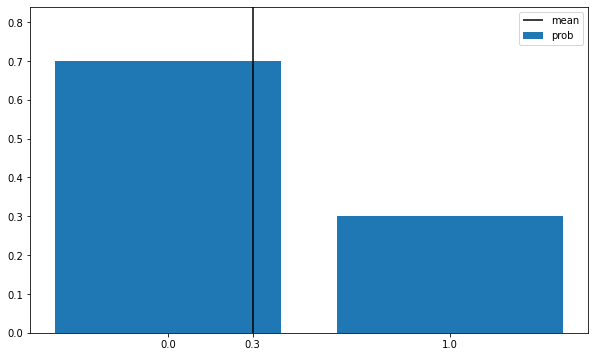

In [7]:
plot_prob(X)
# 중앙의 세로선이 확률변수 X의 기댓값을 나타냄

`scipy.stats`를 사용해 구현

`scipy.stats`에는 베르누이 분포를 따르는 확률변수를 생성할 수 있는 `bernoulli` 함수가 있음

In [8]:
rv = stats.bernoulli(p) # p = 0.3, rv (Random Variable, 확률변수)
print('pmf:', rv.pmf(0), rv.pmf(1))

pmf: 0.7 0.3


- pmf 메서드는 인수로 리스트를 넘길 수 있음
- 리스트의 각 요소에 대한 확률이 저장된 Numpy 의 array 가 반환됨

In [9]:
print('pmf:', rv.pmf([0, 1]))

# cdf 메서드를 사용하면 누적밀도함수를 계산할 수 있음
print('cdf:', rv.cdf([0, 1]))

# mean 을 이용하여 기댓값, var 메서드를 이용하여 분산을 계산 가능
print('mean:', rv.mean(), ', var:', rv.var())

pmf: [0.7 0.3]
cdf: [0.7 1. ]
mean: 0.3 , var: 0.21


#### 베르누이 분포의 정리
- 파라미터 : p
- 취할 수 있는 값 : {0, 1}
- 확률함수 : $p^x(1-p)^{(1-x)}$
- 기댓값 : p
- 분산 : p(1-p)
- scipy.stats : bernoulli(p)

### 6.2 이항분포 (binomial distribution)
성공확률이 p인 베르누이 시행을 n 번 했을 때의 성공 횟수가 따르는 분포

이항분포의 파라미터에는 성공확률인 p와 시행 횟수인 n 

p는 0 &le; p &le; 1, n은 1 이상인 정수

이 책에서는 Bin(n, p)로 표기


![bin](https://user-images.githubusercontent.com/291782/198075433-9f04022b-71f5-44e8-bcbe-4b5514e5f4b3.png)

- 기호 $_nC_x$ 는 **콤비네이션**이라고 부르며, n개라는 서로 다른 것들 중에서 x개를 고를 수 있는 조합의 수를 나타냄

- $_nC_x = \dfrac {n!} {x!(n-x)!}$

- 예) 6명의 학생 중 2명을 고르는 조합은, $_6C_2 = \dfrac {6!} {2! (6-2)! } = 15$ 가 되어 15가지로 계산할 수 있음

*동전을 10번 던져 앞면이 3번 나올 확률*
 - p = $\dfrac {1}{2}$
 - 10번 했을 때의 성공횟수, Bin(10, 1/2)
 - 10번 던져 앞면이 3번 나올 확률은
 - $P(X=3) = _10C_3(\dfrac {1} {2})^3 (1-\dfrac{1}{2})^{(10-3)} = \dfrac {15} {128}$

*주사위를 4번 굴려 6이 나올 확률*

- 이것은 p = 1/6 인 베르누이 시행을 4번 했을 때의 성공 횟수로 볼 수 있기 때문에 $Bin(4, \dfrac {1} {6})$을 따릅니다.
- 그러므로 주사위를 4번 던져 6이 한 번도 나오지 않는 확률은

$P(X=0) = _4C_0(\dfrac{1}{6})^0(1-\dfrac{1}{6})^{(4-0)} = \dfrac {625} {1296}$

로 구할 수 있음

*이항분포의 기댓값과 분산*
- X ~ Bin(n, p) 라고 할 때

$E(X) = np,  V(X) = np(1-p)$



- 이항분포를 Numpy로 구현


In [10]:
from scipy.special import comb

def Bin(n, p) :
    x_set = np.arange(n+1)
    def f(x) :
        if x in x_set :
            return comb(n, x) * p**x * (1-p) ** (n-x)
        else :
            return 0
    return x_set, f


- Bin(10, 0.3)을 따르는 확률변수 X를 작성

In [11]:
n = 10
p = 0.3
X = Bin(n , p)

- 기댓값은 10 * 0.3 = 3, 분산은 10 * 0.3 * 0.7 = 2.1

In [12]:
check_prob(X)

param X: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), <function Bin.<locals>.f at 0x7f42127160e0>)
x_set: [ 0  1  2  3  4  5  6  7  8  9 10] , f: <function Bin.<locals>.f at 0x7f42127160e0>
expected value 3.0
variance 2.1


- 그래프를 그려보자. 이항분포는 기댓값이 정상이 되는 산 모양의 분포를 이룸

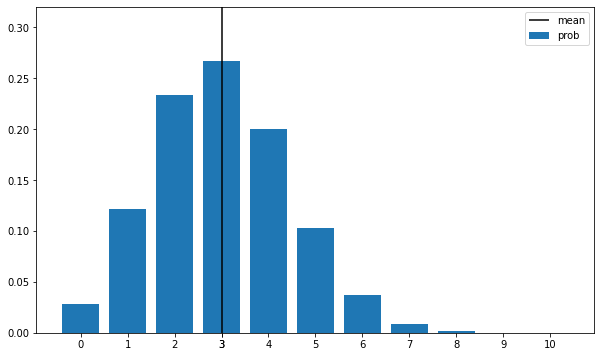

In [13]:
plot_prob(X)

- scipy.stats 에서 이항분포의 확률변수는 *binom* 함수로 생성 가능
- n 을 10으로 고정하고, p를 0.3, 0.5, 0.7로 변화시켜 이항분포가 어떠한 형태가 되는 지 살펴보자

p 0.3
p 0.5
p 0.7


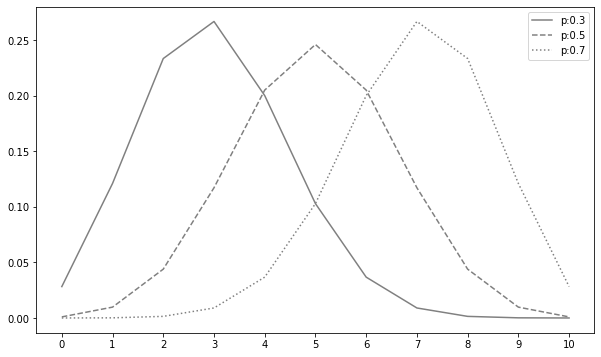

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles) :
    print('p', p)
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
    ax.set_xticks(x_set)
    ax.legend()

plt.show()

#### 이항분포 정리한 결과는 다음과 같음
- 파라미터 : n, p
- 취할 수 있는 값 : {0, 1, ..., n}
- 확률함수 : $_nC_xp^x(1-p)^{(1-x)}$
- 기댓값 : np
- 분산 : np(1 - p)
- scipy.stats : binom(n, p)

### 6.3 기하분포

기하분포 (geometric distribution)는 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포.

![geometric](https://user-images.githubusercontent.com/291782/198838811-eb64ce96-3aab-40ae-8459-e0e986e391b0.png)

- 앞면이 나올 때까지 동전을 던지는 횟수

이것은 p=1/2 인 베르누이 시행이 처음 성공할 때까지 시행한 횟수가 되기 때문에 $Ge(\dfrac {1} {2})$ 을 따름

그러므로 동전을 다섯 번째 던져 처음으로 앞면이 나오는 확률은 

$P(X=5) = (1-\dfrac {1} {2})^4 \times \dfrac {1} {2} = \dfrac {1} {32}$


- 6이 나올 때까지 주사위를 굴린 횟수

p=1/6인 베르누이 시행이 처음 성공할 때까지 시행한 횟수가 되기 때문에 Ge(1/6)을 따름

그러므로 주사위를 세번째 굴려 처음으로 6이 나올 확률은

$P(X=3) = (1 - \dfrac{1}{6})^2 \times \dfrac {1} {6} = \dfrac {25} {216}$

- 기하분포의 기댓값과 분산

X ~ Ge(p) 라고 할 때

$ E(X) = \dfrac {1} {p},  V(X) = \dfrac {(1-p)} {p^2}$


#### 기하분포를 Numpy로 구현
- 기하분포가 취하는 값은 1 이상의 정수 전부이지만, 구현의 편의상 x_set을 1 이상 29 이하인 정수로 함

In [15]:
def Ge(p) :
    x_set = np.arange(1, 30)
    def f(x) :
        if x in x_set :
            return p * (1-p) **(x-1)
        else :
            return 0
    return x_set, f

In [16]:
# 여기서 확률변수 X는 Ge(1/2)를 따르는 것으로 함
p = 0.5
X = Ge(p)

In [17]:
# 기댓값은 1 / (1/2) = 2, 분산은 (1 - (1/2)) / (1/2)^2 = 2
check_prob(X)

param X: (array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), <function Ge.<locals>.f at 0x7f4212636f80>)
x_set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] , f: <function Ge.<locals>.f at 0x7f4212636f80>
expected value 2.0
variance 2.0


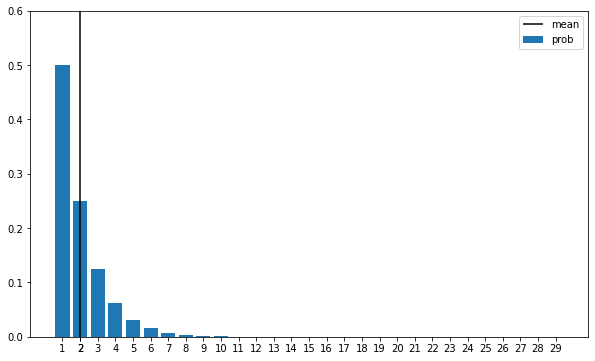

In [18]:
# 확률변수의 값이 커질수록 확률은 지수적으로 감소함
# 11 이상인 값을 취하는 확률은 거의 0이 되므로 그래프에서는 확인할 수 없음
plot_prob(X)

#### 기하분포를 scipy.stats로 구현 (geom)
- 파라미터 p가 0.2, 0.5, 0.8일 때의 기하분포를 그려보자
- 여기서는 x_set을 1이상 14이하인 정수로 제한

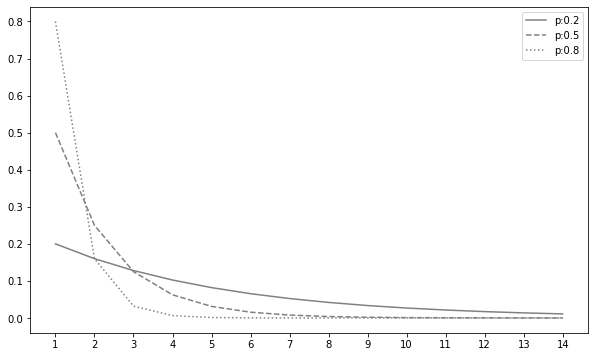

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

linestyles = ['-', '--', ':']


p_arr = [0.2, 0.5, 0.8]

x_set = np.arange(1, 15)
for p, ls in zip(p_arr, linestyles) :
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), 
            label=f'p:{p}', ls=ls, color='gray')
    ax.set_xticks(x_set)
    ax.legend()

plt.show()

- 파라미터 p가 값이 커질수록 지수적으로 감소하는 분포가 되는 것을 확인 가능

**기하분포를 정리하면 다음과 같음**
- 파라미터 : p
- 취할 수 있는 값 : {1, 2, 3, ...}
- 확률함수 : $(1-p)^{(x-1)}p$
- 기댓값 : $\dfrac {1} {p}$
- 분산 : $\dfrac {(1-p)} {p^2}$
- scipy.stats : geom(p)

### 6.4 포아송분포
- 포아송 분포(Poisson distribution)는 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포
- 발생하는 건수의 확률분포이므로, 확률변수가 취할 수 있는 값은 (0, 1, 2, ...) 가 됨
- 포아송 분포의 파라미터는 &lambda;로 나타내고, &lambda; 는 양의 실수
- 이 책에서는 파라미터 &lambda; 인 포아송분포를 Poi(&lambda;)라고 표기

![poisson](https://user-images.githubusercontent.com/291782/198886199-52a70e96-d80f-4a2e-8c06-993d141dd85b.png)

- 하루에 평균 2건의 교통사고가 발생하는 지역에서, 하루 교통사고 발생 건수

    하루당 발생하는 교통사고의 발생건수는 Poi(2)를 따름
    그러므로 이 지역에서 하루에 교통사고가 한 건도 일어나지 않을 확률은

    
$P(X=0)= \dfrac{2^0}{0!} \dot{} e^{-2} = 0.135$ 


- 한 시간에 평균 10번 액세스하는 사이트에 대한 한 시간당 액세스 건수
 
한 시간당 사이트에 대한 액세스 건수는 Poi(10)을 따름.

그러므로 이 사이트에서 한 시간에 정확하게 액세스가 15건 발생하는 확률은

$ P(X=15) = \dfrac {10^{15}} {15!} \dot{} e^{-10} = 0.035 $


- **포아송 분포의 기댓값과 분산은 모두 &lambda;가 됨**. 기댓값과 분산이 같은 것은 포아송 분포의 특징

- 포아송 분포를 Numpy로 구현
- 팩토리얼은 x! 은 `scipy.special` 의 `factorial`을 사용

In [21]:
from scipy.special import factorial

def Poi(lam) :
    x_set = np.arange(20)
    def f(x) :
        if x in x_set :
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else :
            return 0
    return x_set, f

- 여기서 확률변수는 Poi(3)을 따르는 것으로 함

In [25]:
lam = 3
X = Poi(lam)
check_prob(X)

expected value 3.0
variance 3.0


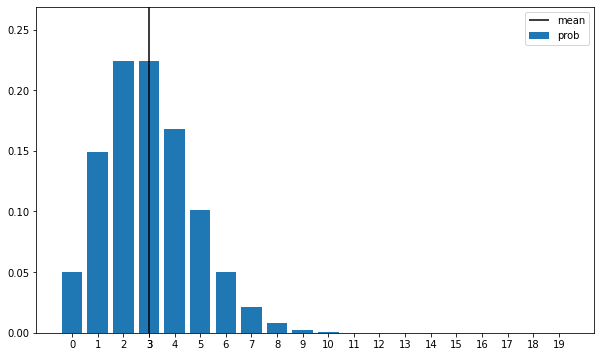

In [26]:
plot_prob(X)

- `scipy.stats`에서 포아송분포는 `poisson` 함수로 생성 가능
- 파라미터 &lambda;를 3, 5, 8로 구현

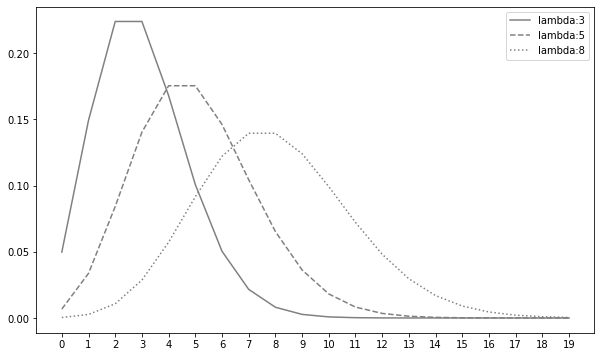

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles) :
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), 
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

- 어떤 파라미터라도 분포의 정상에는 &lambda;가 있고, &lambda;가 커질수록 경사면이 더욱 완만해지는 것을 확인할 수 있음

- 포아송 분포 정리
- 파라미터 : &lambda; (lambda)
- 취할수 있는 값 : {0, 1, 2, ...}
- 확률함수 : $ \dfrac {\lambda^x} {x!} \dot {} e^{-\lambda}$
- 기댓값 : &lambda;
- 분산 : &lambda;
- scipy.stats : poisson(&lambda;)